# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
sp_tracks = pd.read_csv('/content/tracks.csv')
sp_artists = pd.read_csv('/content/artists.csv')

# Viewing Dataset

In [4]:
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [11]:
sp_artists['name'] = sp_artists['name'].fillna('Unknown')
sp_artists['followers'] = sp_artists['followers'].fillna(0)

print("Null values after filling:")
print(sp_artists.isnull().sum())

Null values after filling:
id            0
followers     0
genres        0
name          0
popularity    0
dtype: int64


# Dataset Overview

In [8]:
sp_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [9]:
sp_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


# Finding Blank Cells

In [6]:
pd.isnull(sp_tracks).sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [7]:
pd.isnull(sp_artists).sum()

,0
id,0
followers,13
genres,0
name,3
popularity,0


# Fill Blank Cells

In [19]:
import ast

# Convert 'id_artists' from string representation of a list to an actual list
sp_tracks['id_artists_cleaned'] = sp_tracks['id_artists'].apply(lambda x: ast.literal_eval(x)[0] if pd.notnull(x) and x != '[]' else None)

# Perform the merge using the cleaned ID column
Spotify_df = pd.merge(sp_tracks, sp_artists, left_on='id_artists_cleaned', right_on='id', how='inner')
Spotify_df.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,id_artists_cleaned,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35


In [17]:
pd.isnull(Spotify_df).sum()


,0
id_x,0
name_x,0
popularity_x,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


# Extracting Insights from the Dataset through Analysis📊

# 1. Exploring 10 Least Popular Songs in the Spotify Dataset

In [20]:
a=Spotify_df.sort_values('popularity_y',ascending=True)[0:10]
a[['name_y','popularity_y']]

,name_y,popularity_y
25,Adolphe Bérard,0
69,Fernando Pessoa,0
50,Fernando Pessoa,0
500079,Ratanbai,0
44,Fernando Pessoa,0
46,Grandcubby Trio,0
68,Maria Konopnicka,0
15,Fernando Pessoa,0
30,Perchicot,0
64,Fernando Pessoa,0


# 2. Descriptive Statistics

In [21]:
# descriptive statistics of tracks
Spotify_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity_x,574257.0,2.784158e+01,1.829734e+01,0.0,13.0000,27.000000,41.00000,1.000000e+02
duration_ms,574257.0,2.297864e+05,1.213905e+05,3344.0,175373.0000,215000.000000,263865.00000,5.621218e+06
explicit,574257.0,4.391239e-02,2.049004e-01,0.0,0.0000,0.000000,0.00000,1.000000e+00
danceability,574257.0,5.632945e-01,1.656347e-01,0.0,0.4530,0.577000,0.68500,9.910000e-01
energy,574257.0,5.416113e-01,2.515971e-01,0.0,0.3430,0.548000,0.74800,1.000000e+00
key,574257.0,5.221075e+00,3.517962e+00,0.0,2.0000,5.000000,8.00000,1.100000e+01
loudness,574257.0,-1.019604e+01,5.076846e+00,-60.0,-12.8840,-9.238000,-6.47500,5.376000e+00
mode,574257.0,6.592641e-01,4.739571e-01,0.0,0.0000,1.000000,1.00000,1.000000e+00
speechiness,574257.0,1.050805e-01,1.806847e-01,0.0,0.0339,0.044200,0.07620,9.710000e-01
acousticness,574257.0,4.512684e-01,3.483281e-01,0.0,0.0993,0.425000,0.78500,9.960000e-01


# 3. Discovering the Top 10 Popular Songs in the Spotify Dataset

In [23]:
a=Spotify_df
b=a[a['popularity_y']>90].sort_values('popularity_y',ascending=False)[:10]
b[['name_y','popularity_y','artists']]

,name_y,popularity_y,artists
233359,Justin Bieber,100,['Justin Bieber']
233360,Justin Bieber,100,['Justin Bieber']
233361,Justin Bieber,100,['Justin Bieber']
233362,Justin Bieber,100,['Justin Bieber']
233363,Justin Bieber,100,['Justin Bieber']
316090,Justin Bieber,100,['Justin Bieber']
175088,Justin Bieber,100,['Justin Bieber']
175089,Justin Bieber,100,['Justin Bieber']
175090,Justin Bieber,100,['Justin Bieber']
213819,Justin Bieber,100,"['Justin Bieber', 'Ludacris']"


# 4. Setting Release Date as the Index Column

In [27]:
# Spotify_df.set_index('release_date', inplace=True) # This line was already executed and caused the error on re-run
Spotify_df.index = pd.to_datetime(Spotify_df.index, errors='coerce', format='mixed')
years = Spotify_df.index.year
Spotify_df.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,liveness,valence,tempo,time_signature,id_artists_cleaned,id_y,followers,genres,name_y,popularity_y
release_date,,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,...,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,...,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,...,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,...,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,...,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35


# 5. Extracting Artist Name from the 18th Row of the Dataset

In [28]:
Spotify_df[['artists']].iloc[18]

,1922-01-01
artists,['Victor Boucher']


# 6. Converting Song Duration from Milliseconds to Seconds

In [29]:
Spotify_df['duration'] = Spotify_df['duration_ms'].apply (lambda x : round(x/1000))
Spotify_df.drop('duration_ms', inplace = True, axis=1)
Spotify_df.duration.head()

,duration
release_date,
1922-02-22,127
1922-06-01,98
1922-03-21,182
1922-03-21,177
1922-01-01,163


# 7. Visualization: Pearson Correlation Heatmap for Two Variables

[Text(0.5, 0, 'popularity_x'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature'),
 Text(14.5, 0, 'followers'),
 Text(15.5, 0, 'popularity_y'),
 Text(16.5, 0, 'duration')]

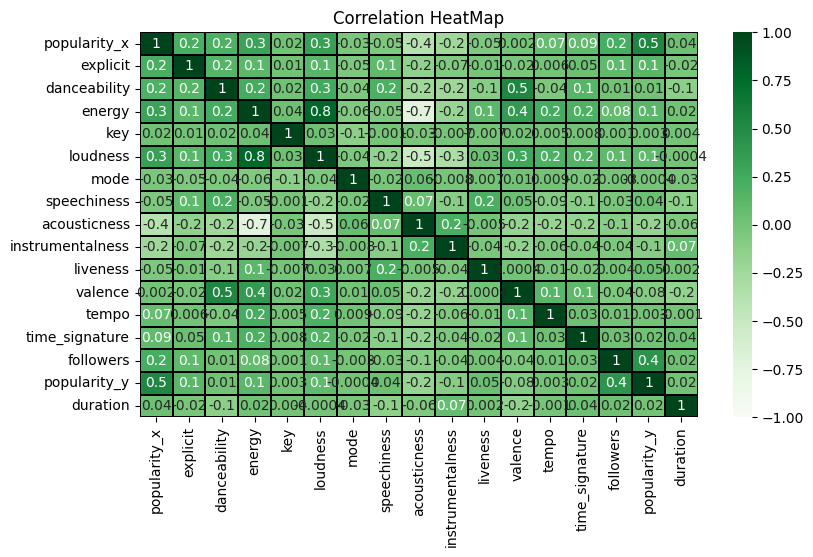

In [30]:
td = Spotify_df.select_dtypes(include='number').corr(method='pearson')
plt.figure(figsize=(9,5))
hmap = sns.heatmap(td, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=0.1, linecolor='black')
hmap.set_title('Correlation HeatMap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90)

# 8. Creating a 4% Sample of the Entire Dataset

In [31]:
sample_sp=Spotify_df.sample(int(0.004*len(Spotify_df)))
print(len(sample_sp))

2297


# 9. Regression Plot of Loudness vs. Energy with Regression Line

[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

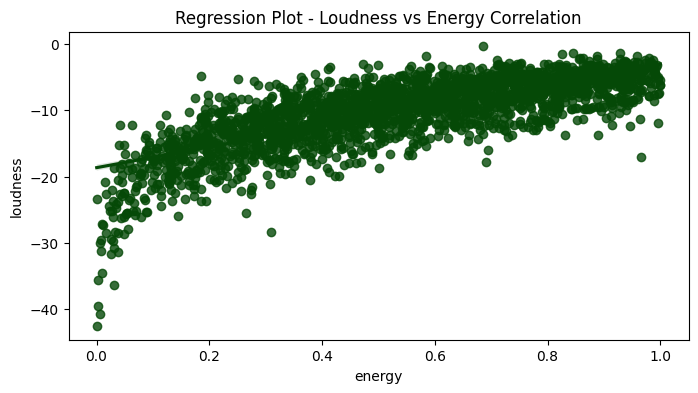

In [32]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

# 10. Regression Plot of Popularity vs. Acousticness with Regression Line

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

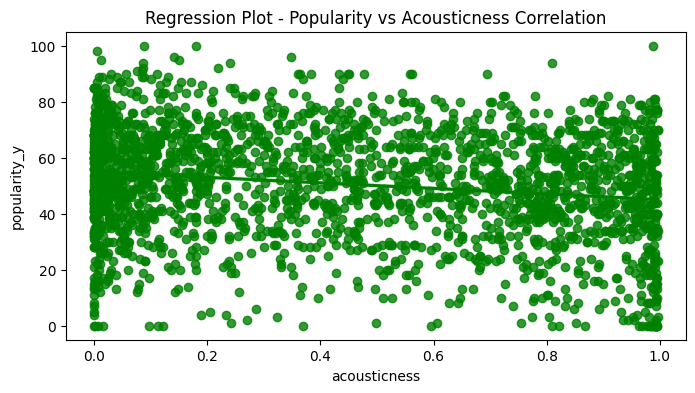

In [34]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='popularity_y', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

# 11. Adding a New Column to the Tracks Table

In [35]:
Spotify_df['dates']=Spotify_df.index.get_level_values('release_date')
Spotify_df.dates=pd.to_datetime(Spotify_df.dates)
years=Spotify_df.dates.dt.year
Spotify_df.head()

,id_x,name_x,popularity_x,explicit,artists,id_artists,danceability,energy,key,loudness,...,tempo,time_signature,id_artists_cleaned,id_y,followers,genres,name_y,popularity_y,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,104.851,3,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,127,1922-02-22
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,102.009,1,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0,98,1922-06-01
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23,182,1922-03-21
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23,177,1922-03-21
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,103.220,4,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35,163,1922-01-01


# 12. Graph: Number of Songs per Year

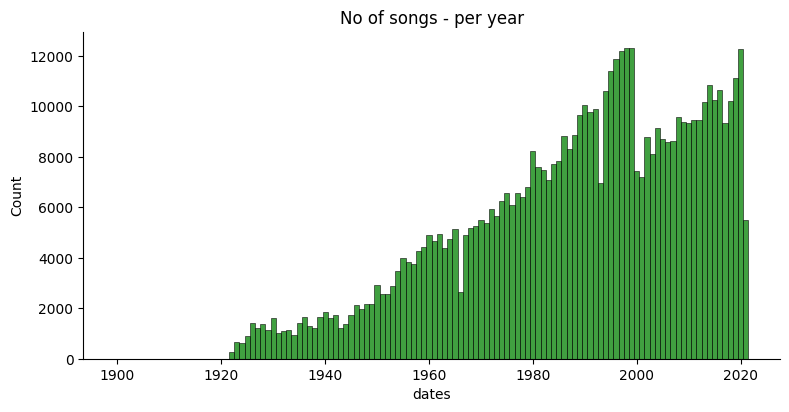

In [36]:
sns.displot(years, discrete=True, aspect=2, height=4, kind='hist',color='g').set(title='No of songs - per year')

# 13. Line Graph: Duration of Songs Over Each Year

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938')

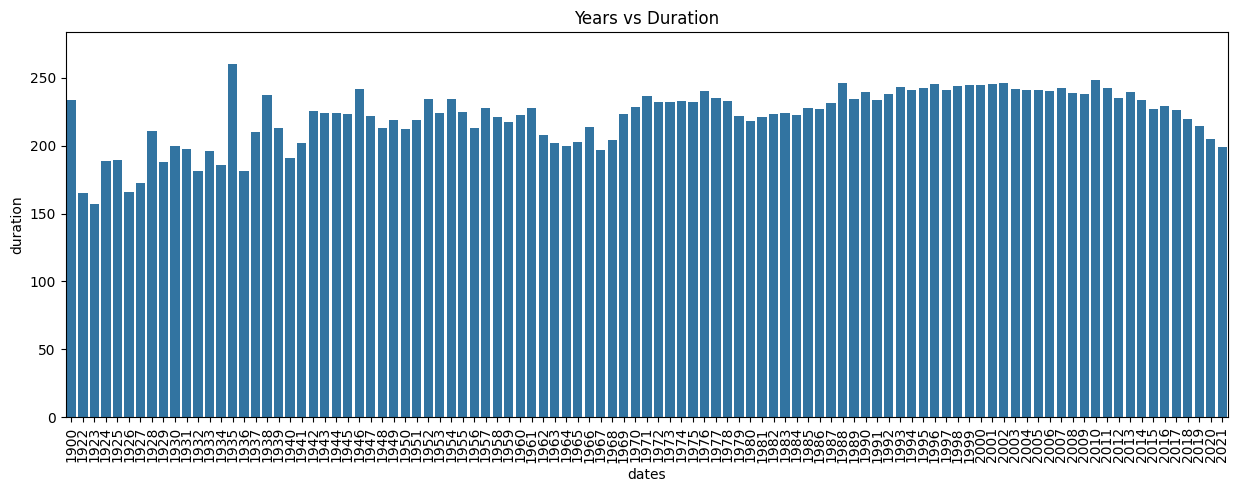

In [37]:
total_dr = Spotify_df.duration
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, err_kws={'linewidth': False}).set(title='Years vs Duration')
plt.xticks(rotation=90)

# 14. Horizontal Bar Plot: Song Duration Across Different Genres

In [38]:
# Cleaning the id_artists from sp_tracks to match with the id from sp_artists
Spotify_df['id_artists_clean'] = Spotify_df['id_artists'].str.strip("[]'\"").str.split(',').str[0]

In [39]:
genre_duration = Spotify_df.groupby('genres')['duration'].sum().sort_values(ascending=False).reset_index()

top_genres = genre_duration.head(10)

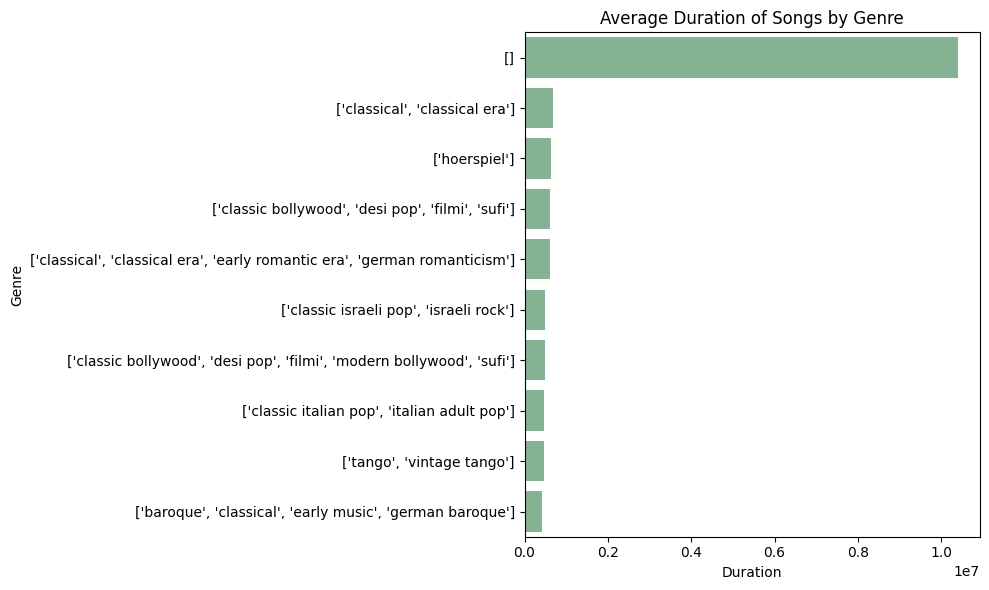

In [40]:
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

sns.barplot(y='genres', x='duration', data=top_genres)

plt.title('Average Duration of Songs by Genre')
plt.xlabel('Duration')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 15. Bar Plot: Top Five Genres by Popularity

[Text(0.5, 1.0, 'Genres by Popularity-Top 5')]

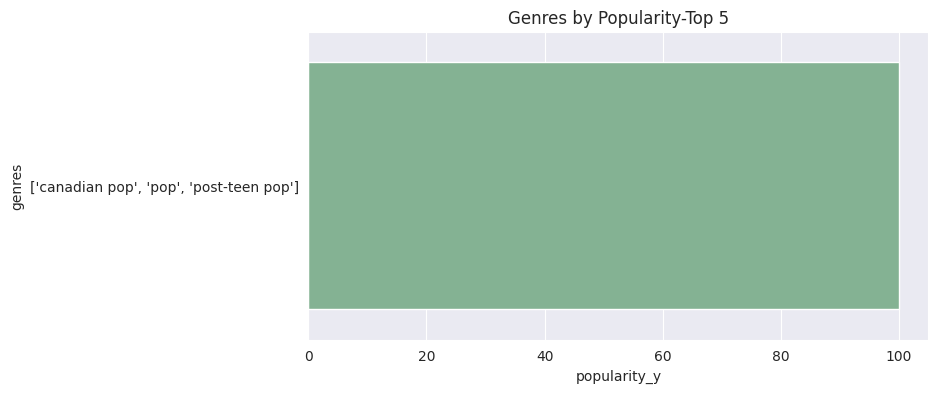

In [43]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = Spotify_df.sort_values('popularity_y', ascending=False)[:10]
sns.barplot(y = 'genres', x = 'popularity_y', data = Top).set(title='Genres by Popularity-Top 5')

# 16. Audio Feature Trends Over Time

In [45]:
Spotify_df['year'] = Spotify_df.index.year

yearly_features = (
    Spotify_df
    .groupby('year')[['danceability', 'energy', 'acousticness']]
    .mean()
    .reset_index()
)

yearly_features.head()

,year,danceability,energy,acousticness
0,1900,0.659000,0.791000,0.139000
1,1922,0.541207,0.329083,0.892674
2,1923,0.637332,0.266977,0.859965
3,1924,0.593344,0.356725,0.866266
4,1925,0.617391,0.263749,0.912170


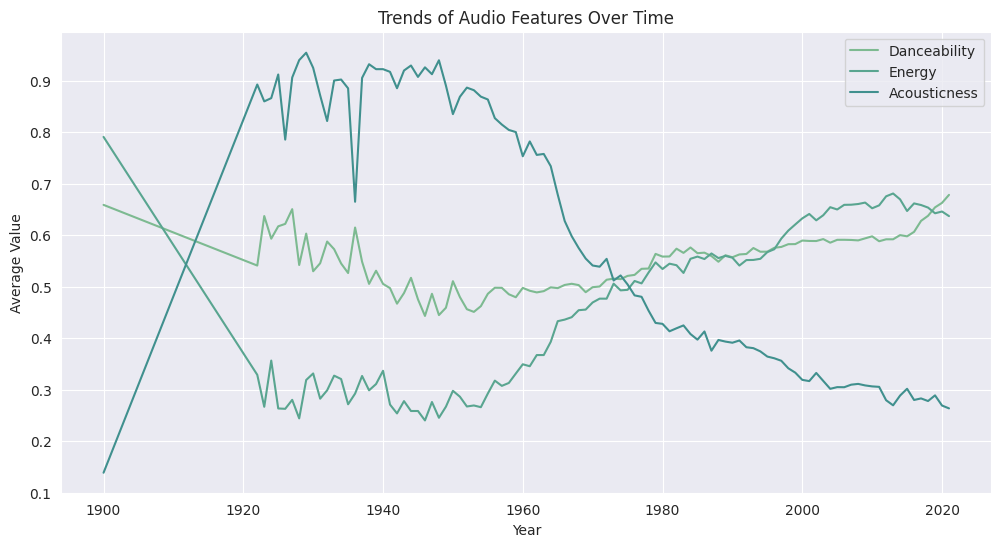

In [47]:
plt.figure(figsize=(12, 6))

plt.plot(yearly_features['year'], yearly_features['danceability'], label='Danceability')
plt.plot(yearly_features['year'], yearly_features['energy'], label='Energy')
plt.plot(yearly_features['year'], yearly_features['acousticness'], label='Acousticness')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Trends of Audio Features Over Time')
plt.legend()
plt.grid(True)

plt.show()

#17. Identify Top Artists by Average Song Popularity

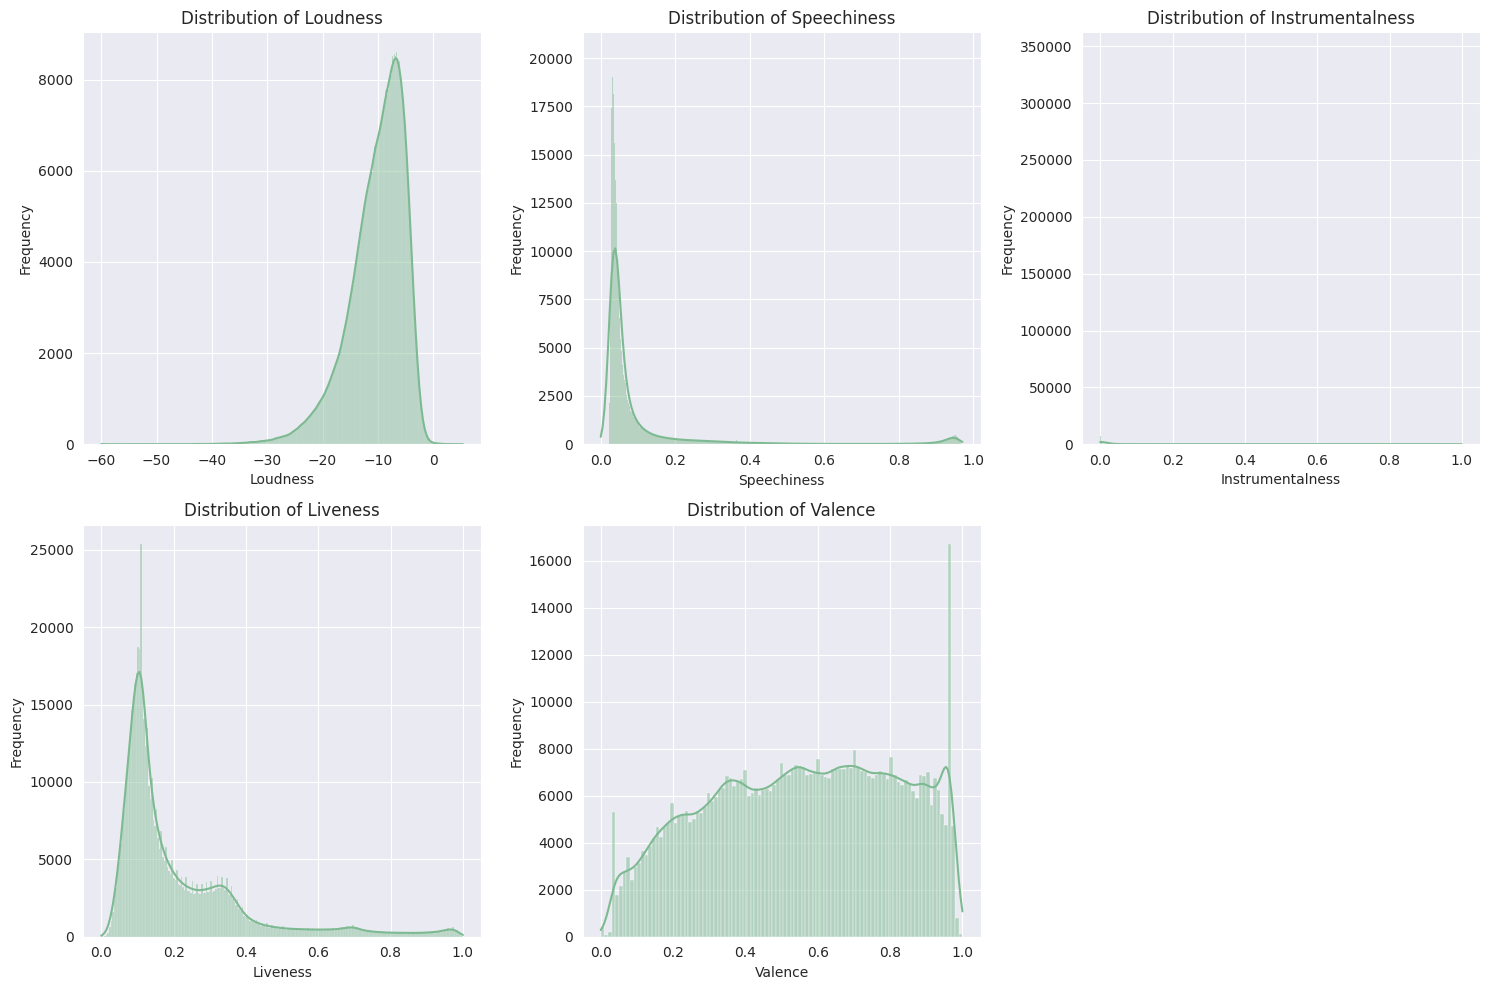

In [50]:
audio_features = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(2, 3, i) # 2 rows, 3 columns, i-th plot
    sns.histplot(Spotify_df[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [48]:
top_artists_by_popularity = Spotify_df.groupby('name_y')['popularity_y'].mean().sort_values(ascending=False).head(10)
print('Top 10 Artists by Average Song Popularity:')
print(top_artists_by_popularity)

Top 10 Artists by Average Song Popularity:
name_y
Justin Bieber    100.0
Bad Bunny         98.0
Drake             98.0
Taylor Swift      98.0
Juice WRLD        96.0
The Weeknd        96.0
BTS               96.0
Ariana Grande     95.0
Myke Towers       95.0
J Balvin          95.0
Name: popularity_y, dtype: float64


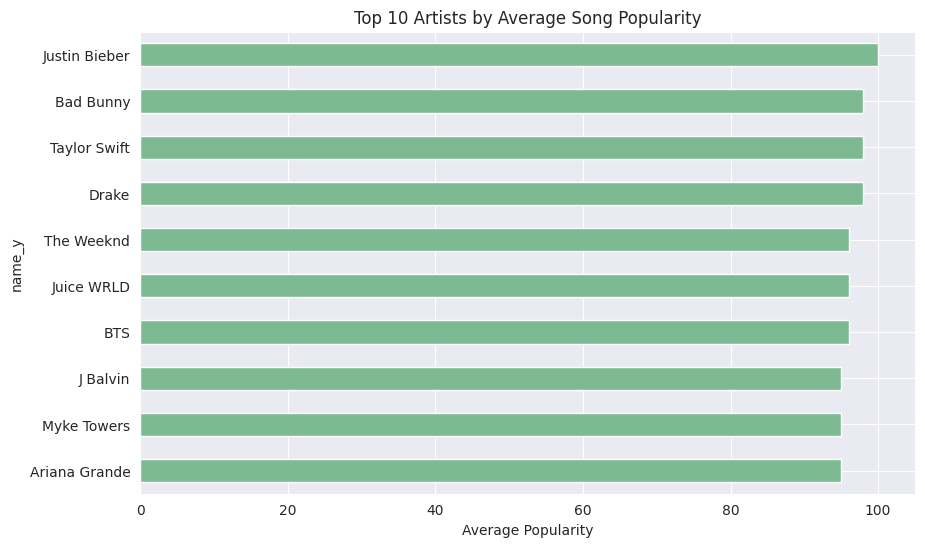

In [51]:
# Select top 10
top10_popularity = top_artists_by_popularity.head(10)

plt.figure(figsize=(10,6))
top10_popularity.sort_values().plot(kind='barh')

plt.xlabel("Average Popularity")
plt.title("Top 10 Artists by Average Song Popularity")

plt.show()

#18. Identify Top Artists by Number of Tracks

In [49]:
top_artists_by_tracks = Spotify_df.groupby('name_y').size().sort_values(ascending=False).head(10)
print('Top 10 Artists by Number of Tracks:')
print(top_artists_by_tracks)

Top 10 Artists by Number of Tracks:
name_y
Die drei ???               3856
Lata Mangeshkar            2325
TKKG Retro-Archiv          2006
Francisco Canaro           2004
Johann Sebastian Bach      1983
Wolfgang Amadeus Mozart    1818
Benjamin Blümchen          1503
Bibi Blocksberg            1472
Ludwig van Beethoven       1252
Frédéric Chopin            1128
dtype: int64


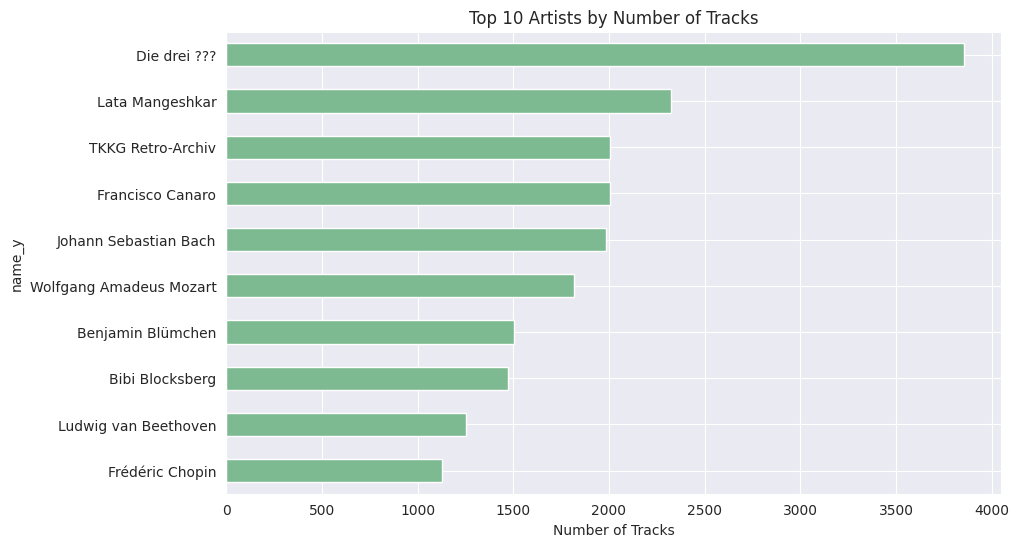

In [52]:
plt.figure(figsize=(10,6))

top_artists_by_tracks.sort_values().plot(kind='barh')

plt.xlabel("Number of Tracks")
plt.title("Top 10 Artists by Number of Tracks")

plt.show()

# 20. Report Summery

The analysis of Spotify data reveals a clear distinction between artist popularity and catalog size. The top artists by average song popularity are predominantly contemporary global performers such as Justin Bieber, Bad Bunny, Drake, and Taylor Swift, all maintaining exceptionally high popularity scores. This reflects strong streaming performance, consistent audience engagement, and alignment with current music trends. In contrast, artists with the highest number of tracks are largely classical composers and archival music collections, including Johann Sebastian Bach, Mozart, and Beethoven, whose extensive discographies result from historical compositions and multiple recordings. However, these artists do not rank among the most popular in terms of average streaming metrics. The findings indicate that in the modern streaming ecosystem, commercial success is driven more by hit impact and listener engagement than by the total volume of released tracks.

🔍 Key Insight

There is a clear distinction between:

🎯 Popularity-driven modern artists

📚 High-volume historical/classical artists

The data reveals that:

High number of tracks ≠ High popularity

Modern streaming success appears to depend more on:

Hit-based strategy

Digital marketing

Genre trends

Streaming algorithms

Rather than total discography size.

📌 Overall Conclusion

The Spotify dataset reflects the current streaming economy where:

A few mainstream artists dominate popularity metrics.

Classical and legacy artists dominate catalog volume.

Commercial impact is more correlated with engagement and trend alignment than sheer number of tracks.